**CUADERNO: MODELO DE BLOQUES 3D CON PYKRIGE (EN EDICIÓN)**

*Prueba de la biblioteca PyKrige para la generación de un modelo 3d para Concentraciones de Cu (%).*

POR HEBER HERNÁNDEZ GUERRA

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pykrige.ok3d import OrdinaryKriging3D
%matplotlib inline
carpeta_origen = "C:/Users/Heber/Desktop/curso_geopython/dataset_curso/"
archivo_1 = "muestras_cu.csv" # dataset con concentraciones de Cu y Au
df = pd.read_csv(carpeta_origen + archivo_1, sep=';') #df = DataFrame
xs = df1['Este [X]']
ys = df1['Norte [Y]']
zs = df1['Cota [Z]']
values = df1['Ley de Cobre [%]']
marker_size=15
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Este [X],2380.0,166.575294,87.226962,0.20,100.40000,160.4000,220.40000,399.000
Norte [Y],2380.0,287.579412,157.945473,2.20,158.00000,292.9000,413.00000,598.900
Cota [Z],2380.0,81.264748,36.016716,6.00,53.45000,84.0000,109.25000,136.000
Ley de Cobre [%],2380.0,1.053168,0.644953,0.12,0.62000,0.9400,1.33000,7.240
Ley de Oro [ppm],2380.0,3.949339,7.216218,0.00,0.20275,1.1485,4.30075,69.854
Tipo de roca,2380.0,2.268487,1.151317,1.00,2.00000,2.0000,2.00000,7.000


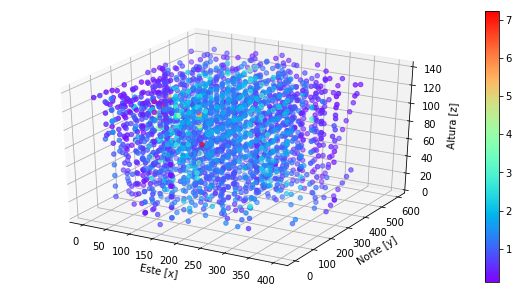

In [34]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
xs,ys,zs = x_drill,y_drill,z_drill
values = cu_drill
p = ax.scatter3D(xs, ys, zs=zs, c=values, cmap='rainbow') #https://matplotlib.org/examples/color/colormaps_reference.html
fig.colorbar(p, ax=ax)
ax.set_xlabel('Este [x]')
ax.set_ylabel('Norte [y]')
ax.set_zlabel('Altura [z]')
ax.set_title('')
plt.show()

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Using 'spherical' Variogram Model
Partial Sill: 0.22371915773735382
Full Sill: 0.4448786730701002
Range: 161.672060626591
Nugget: 0.22115951533274636 



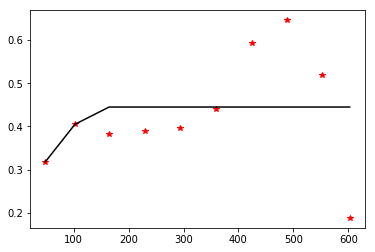

Calculating statistics on variogram model fit...
Q1 = 0.46108189209987926
Q2 = 0.7610599838066893
cR = 0.2179168713682741 



In [35]:
x = np.array(df['Este [X]'])
y = np.array(df['Norte [Y]'])
z = np.array(df['Cota [Z]'])
val = np.array(df['Ley de Cobre [%]'])
ok3d = OrdinaryKriging3D(x,y,z,val,variogram_model='spherical', nlags=10, enable_plotting=True, verbose=True)

Executing Ordinary Kriging...



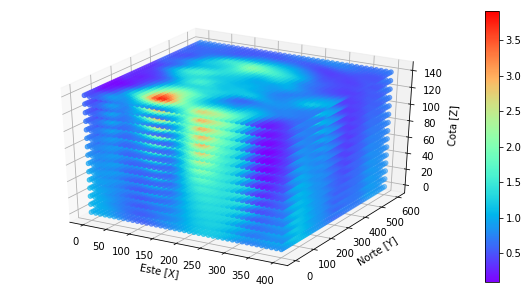

In [40]:
gridx= np.linspace(0,410, num=41, endpoint=False)
gridy= np.linspace(0,610, num=61, endpoint=False)
gridz= np.linspace(0,150, num=15, endpoint=False)
zg, yg, xg = np.meshgrid(gridz, gridy, gridx, indexing='ij')
k3d, ss3d = ok3d.execute('grid', gridx, gridy, gridz)
k = k3d.ravel() # devuelve una matriz aplanada contigua.
var_1 = ss3d.ravel()
z_g = zg.ravel()
x_g = xg.ravel()
y_g = yg.ravel()
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
xs,ys,zs = x_g, y_g, z_g
valores = k
p = ax.scatter3D(xs, ys, zs=zs, c=valores, cmap='rainbow')
ax.set_xlabel("Este [X]")
ax.set_ylabel("Norte [Y]")
ax.set_zlabel("Cota [Z]")
ax.set_title("")
fig.colorbar(p, ax=ax)
plt.show()